# Los Angeles County Fire Department stations and boundaries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import geojson
import json
import numpy as np
from altair import datum
import altair as alt
alt.renderers.enable('notebook')
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
pd.options.display.float_format = '{:,.0f}'.format
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Read geo data on station locations and station boundaries

In [2]:
stations_points = gpd.read_file('/Users/mhustiles/data/github/notebooks/la-county-fire-stations/input/stations.geojson')

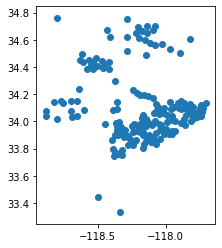

In [3]:
stations_points.plot()

In [4]:
stations_poly = gpd.read_file('/Users/mhustiles/data/github/notebooks/la-county-fire-stations/input/stations-boundaries.geojson')

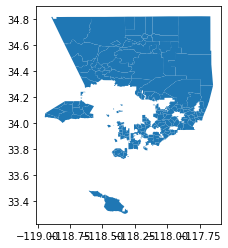

In [5]:
stations_poly.plot()

### How many stations? 

In [6]:
len(stations_points)

173

### Fire district boundaries

In [7]:
fireboundary = gpd.read_file('input/la-county-fire-district-boundary-4326.geojson')

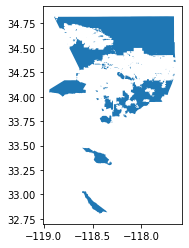

In [8]:
fireboundary.plot()

### Clean up all three dataframes

In [9]:
stations_points.head()

,OBJECTID,STANUM,ADDRESS,CITY,STATEZIP,BN,DIV,REGION,geometry
0,1,77,46833 Peace Valley Road,Gorman,CA 93243-0002,6,III,North,POINT (-118.7974012916258 34.75938410003366)
1,2,112,8812 W. Avenue E-8,Lancaster,CA 93535-9662,11,V,North,POINT (-118.2881735733026 34.75440332039163)
2,3,117,44851 30th Street East,Lancaster,CA 93535-1338,11,V,North,POINT (-118.0774595896322 34.69866289425627)
3,4,33,44947 Date Avenue,Lancaster,CA 93534-3213,11,V,North,POINT (-118.1413780962959 34.69938647991133)
4,5,130,44558 40th Street West,Lancaster,CA 93536-9575,11,V,North,POINT (-118.2010915389812 34.6928139354909)


In [10]:
stations_points.columns = stations_points.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [11]:
stations_poly.columns = stations_poly.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [12]:
fireboundary.columns = fireboundary.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [13]:
stations_poly[['objectid','stanum','battid']] = stations_poly[['objectid','stanum','battid']].astype(str)
stations_points[['objectid','stanum','bn']] = stations_points[['objectid','stanum','bn']].astype(str)

In [14]:
stations_poly['stanum'] = stations_poly['stanum'].str.replace('.0','', regex=False)
stations_points['stanum'] = stations_poly['stanum'].str.replace('.0','', regex=False)

In [15]:
stations_points.head()

,objectid,stanum,address,city,statezip,bn,div,region,geometry
0,1,47,46833 Peace Valley Road,Gorman,CA 93243-0002,6,III,North,POINT (-118.7974012916258 34.75938410003366)
1,2,47,8812 W. Avenue E-8,Lancaster,CA 93535-9662,11,V,North,POINT (-118.2881735733026 34.75440332039163)
2,3,47,44851 30th Street East,Lancaster,CA 93535-1338,11,V,North,POINT (-118.0774595896322 34.69866289425627)
3,4,47,44947 Date Avenue,Lancaster,CA 93534-3213,11,V,North,POINT (-118.1413780962959 34.69938647991133)
4,5,119,44558 40th Street West,Lancaster,CA 93536-9575,11,V,North,POINT (-118.2010915389812 34.6928139354909)


In [16]:
stations_poly.head()

,objectid,stanum,battid,div,region,shape_area,shape_len,geometry
0,70,47,10,IX,East,"2,214,337","8,413",(POLYGON ((-118.0873327354768 34.0994798936753...
1,71,47,10,IX,East,"503,442","3,483",(POLYGON ((-118.0805711499157 34.1012427928355...
2,72,47,10,IX,East,"136,174","1,632",(POLYGON ((-118.0836898611238 34.1026684647563...
3,73,47,10,IX,East,"112,442","1,629",(POLYGON ((-118.0822940137452 34.0991632000816...
4,115,119,19,VIII,East,"384,771,059","106,795",(POLYGON ((-117.8702935294601 33.9965060848282...


In [17]:
stations_poly.to_file('/Users/mhustiles/data/github/notebooks/la-county-fire-stations/output/stations_poly.geojson', \
                      driver='GeoJSON')

In [18]:
stations_points.to_file('/Users/mhustiles/data/github/notebooks/la-county-fire-stations/output/stations_points.geojson', \
                      driver='GeoJSON')

In [19]:
fireboundary.to_file('/Users/mhustiles/data/github/notebooks/la-county-fire-stations/output/fireboundary.geojson', \
                      driver='GeoJSON')